In [33]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows=2000

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [34]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2098
Number of edges: 21716
Average degree:  20.7016


In [64]:
nodes=pd.read_csv('../csv/nodes.csv',index_col='id')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes_df=nodes[nodes.PY>2006]
old_nodes=old_nodes_df.index.values
new_nodes=new_nodes_df.index.values
df=old_nodes_df
print df.shape


(942, 5)


In [65]:
g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 933
Number of edges: 5373
Average degree:  11.5177


Name: 
Type: Graph
Number of nodes: 933
Number of edges: 5373
Average degree:  11.5177
23


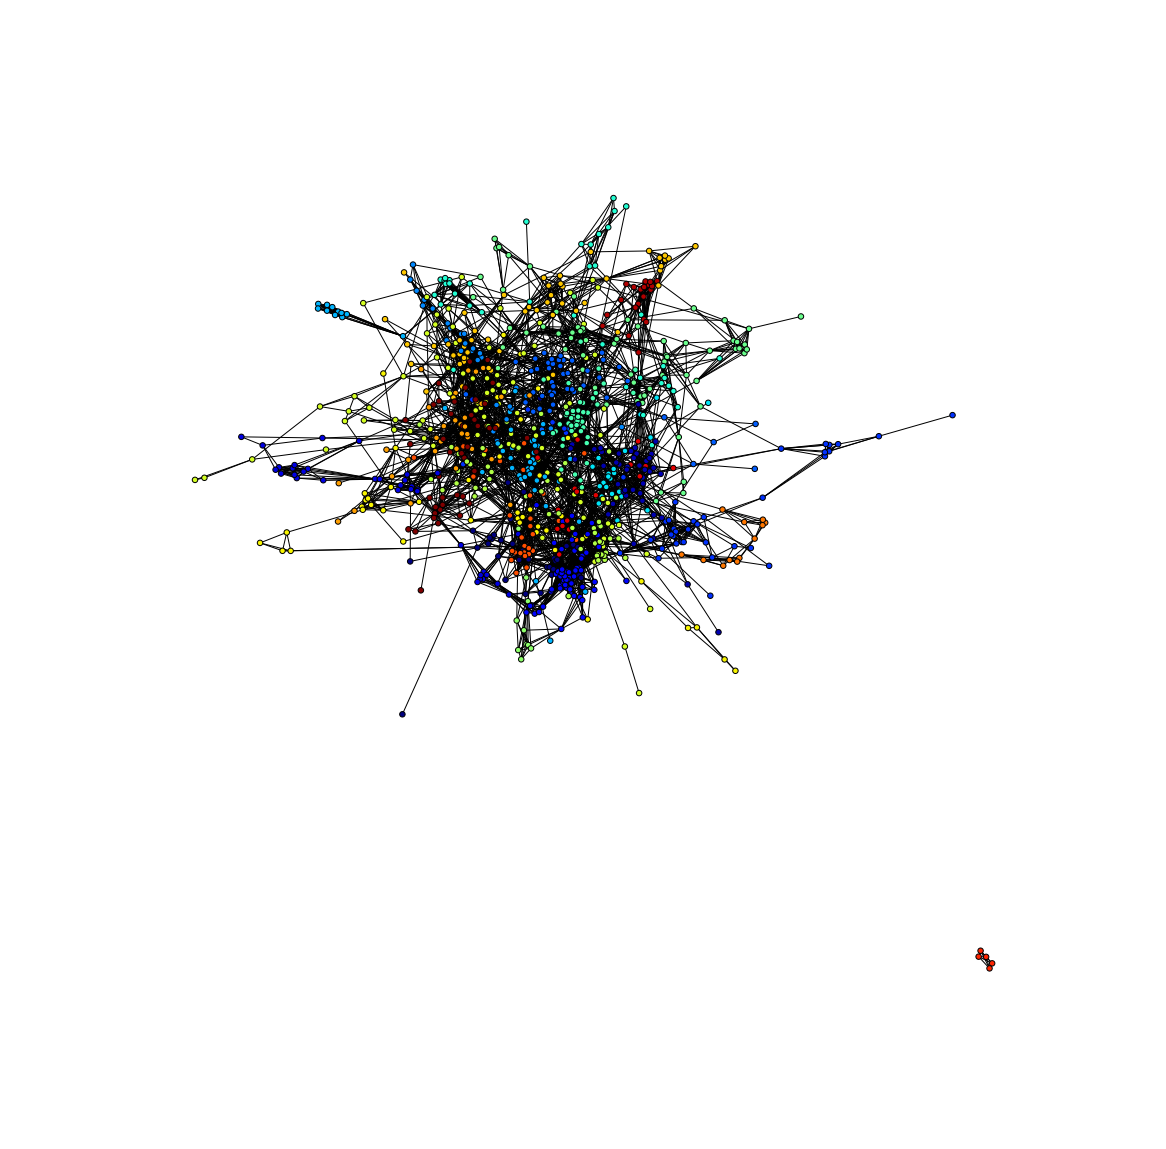

In [66]:
def cluster(g):
    deg = g.degree()
    to_remove = [n for n in deg if deg[n] == 0]
    g.remove_nodes_from(to_remove)
    print nx.info(g)
    spring_pos = nx.spring_layout(g)
    parts = community.best_partition(g)
    community.modularity(parts,g)
    values = [parts.get(node) for node in g.nodes()]
    print max(values)
    plt.figure(figsize=(20,20))
    plt.axis("off")
    nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 30, with_labels = False)
    return(parts)
parts=cluster(g)

In [68]:
df.loc[:,'cluster']=0
df

,label,DE,PY,SO,TC,cluster
id,,,,,,
760,"Perceived information quality in data exchanges: Effects on risk, trust, and intention to use",perceived information quality; B2B electronic commerce; electronic data exchanges; perceived risk; trust; interorganizational performance,2006,INFORMATION SYSTEMS RESEARCH,105,0
761,Understanding the impact of collaboration software on product design and development,collaborative product commerce; new product development; collaboration software,2006,INFORMATION SYSTEMS RESEARCH,43,0
762,Formulating the data-flow perspective for business process management,workflow modeling; data-flow specification; data-flow anomalies; data-flow verification; dependency analysis; process data diagram,2006,INFORMATION SYSTEMS RESEARCH,54,0
763,"The nature and role of feedback text comments in online marketplaces: implications for trust building, price premiums, and seller differentiation",feedback; feedback mechanisms; feedback text comments; price premiums; seller differentiation; seller heterogeneity; trust; benevolence; credibility; numerical ratings; online marketplaces; auctions,2006,INFORMATION SYSTEMS RESEARCH,196,0
764,Individual cognition and dual-task interference in group support systems,group support systems; GSS; synchronous text discussion; decision making; collaboration technology; dual-task interference; individual cognition; information exchange; information processing; virtual teams; cognitive interference,2006,INFORMATION SYSTEMS RESEARCH,17,0
765,The influence of recommendations and consumer reviews on evaluations of websites,personalization; recommendations; consumer reviews; social presence; perceived usefulness; e-commerce,2006,INFORMATION SYSTEMS RESEARCH,118,0
766,Enabling customer-centricity using wikis and the wiki way,customer-centricity; knowledge creation; knowledge management; open source; wiki,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,76,0
767,Personalized content recommendation and user satisfaction: Theoretical synthesis and empirical findings,content recommendation; personalization; recommendation systems; user satisfaction,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,48,0
768,Online consumer search depth: Theories and new findings,clickstream data; consumer search behavior; online search behavior; search depth; search model,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,9,0


In [69]:
for x in parts:
    df.set_value(x,'cluster',parts[x])

In [70]:
dg=df[['label','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

KeyError: "['id'] not in index"

In [23]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
#docs=df.label+df.DE
docs=df.label

In [25]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [26]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
stop_list.remove('information')
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [29]:
df['terms']= docs_stemed

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
dg['keyword']=''
dg['key terms']=''

for mod in dg.index:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']
    word_filtered=[word for word in words if not(word in ['inform','technolog','system'])]
    words_counter = Counter(word_filtered)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_filtered=[term for term in terms if not(term in ['inform technolog','inform system'])]
    terms_counter= Counter(terms_filtered)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [15]:
dg.sort_values('cluster size',ascending=False)

,cluster size,keyword,key terms
3,129,"[(servic, 53), (measur, 27), (user, 24), (model, 19), (qualiti, 16)]","[(servic qualiti, 12), (user satisfact, 8), (measur inform, 8), (onlin servic, 6), (system servic, 5)]"
9,129,"[(network, 48), (social, 47), (commun, 45), (media, 31), (onlin, 23)]","[(social media, 17), (social network, 14), (onlin commun, 10), (empir analysi, 4), (network extern, 4)]"
1,128,"[(chang, 13), (design, 12), (methodolog, 12), (organiz, 10), (develop, 10)]","[(system develop, 5), (organiz chang, 3), (principl conduct, 3), (divers inform, 3), (design scienc, 3)]"
17,122,"[(firm, 36), (perform, 23), (capabl, 19), (competit, 17), (agil, 16)]","[(firm perform, 14), (technolog invest, 9), (empir investig, 7), (technolog capabl, 6), (capabl firm, 5)]"
19,107,"[(trust, 47), (onlin, 29), (web, 25), (cultur, 15), (site, 12)]","[(web site, 10), (trust onlin, 5), (onlin marketplac, 4), (virtual team, 3), (moder role, 3)]"
10,102,"[(outsourc, 39), (product, 23), (govern, 18), (contract, 18), (empir, 10)]","[(technolog outsourc, 14), (process outsourc, 7), (busi process, 6), (empir analysi, 5), (outsourc contract, 4)]"
13,91,"[(group, 39), (support, 25), (collabor, 24), (electron, 11), (creativ, 11)]","[(support system, 14), (group support, 13), (electron brainstorm, 8), (decis make, 6), (collabor technolog, 5)]"
7,91,"[(model, 21), (accept, 20), (adopt, 18), (behavior, 13), (usag, 11)]","[(technolog accept, 12), (accept model, 4), (technolog adopt, 4), (technolog usag, 4), (usag behavior, 3)]"
21,90,"[(decis, 22), (recommend, 12), (support, 10), (model, 9), (induct, 7)]","[(decis support, 8), (decis make, 6), (decis aid, 5), (support system, 5), (credibl assess, 4)]"
0,89,"[(secur, 45), (risk, 30), (manag, 15), (invest, 13), (option, 10)]","[(inform secur, 22), (real option, 9), (technolog invest, 8), (system secur, 7), (secur risk, 6)]"


In [16]:
cluster={
    14:'IT & Firms',
    11: 'Software & Sourcing',
    3: 'Group Support',
    16: 'IS Research',
    13: 'Decision Supp.',
    7: 'Tech. Accept.',
    10: 'Knowl. Manage.',
    5: 'User Satisf.',
    1: 'Learn & Train',
    23: 'IS & Innovation',
    15: 'Market & Auct.',
    0: 'E-com & Trust',
    4: 'Website & Search',
    9: 'Supp. Chain',
    2: 'Bus. Process',
    17: 'Organz. Change',
    19: 'Database',
    6: 'IT Strateg.',
    8: 'Online Commun.',
    22: 'IT & Jobs'   
}

In [17]:
node_size=dg['cluster size']*5

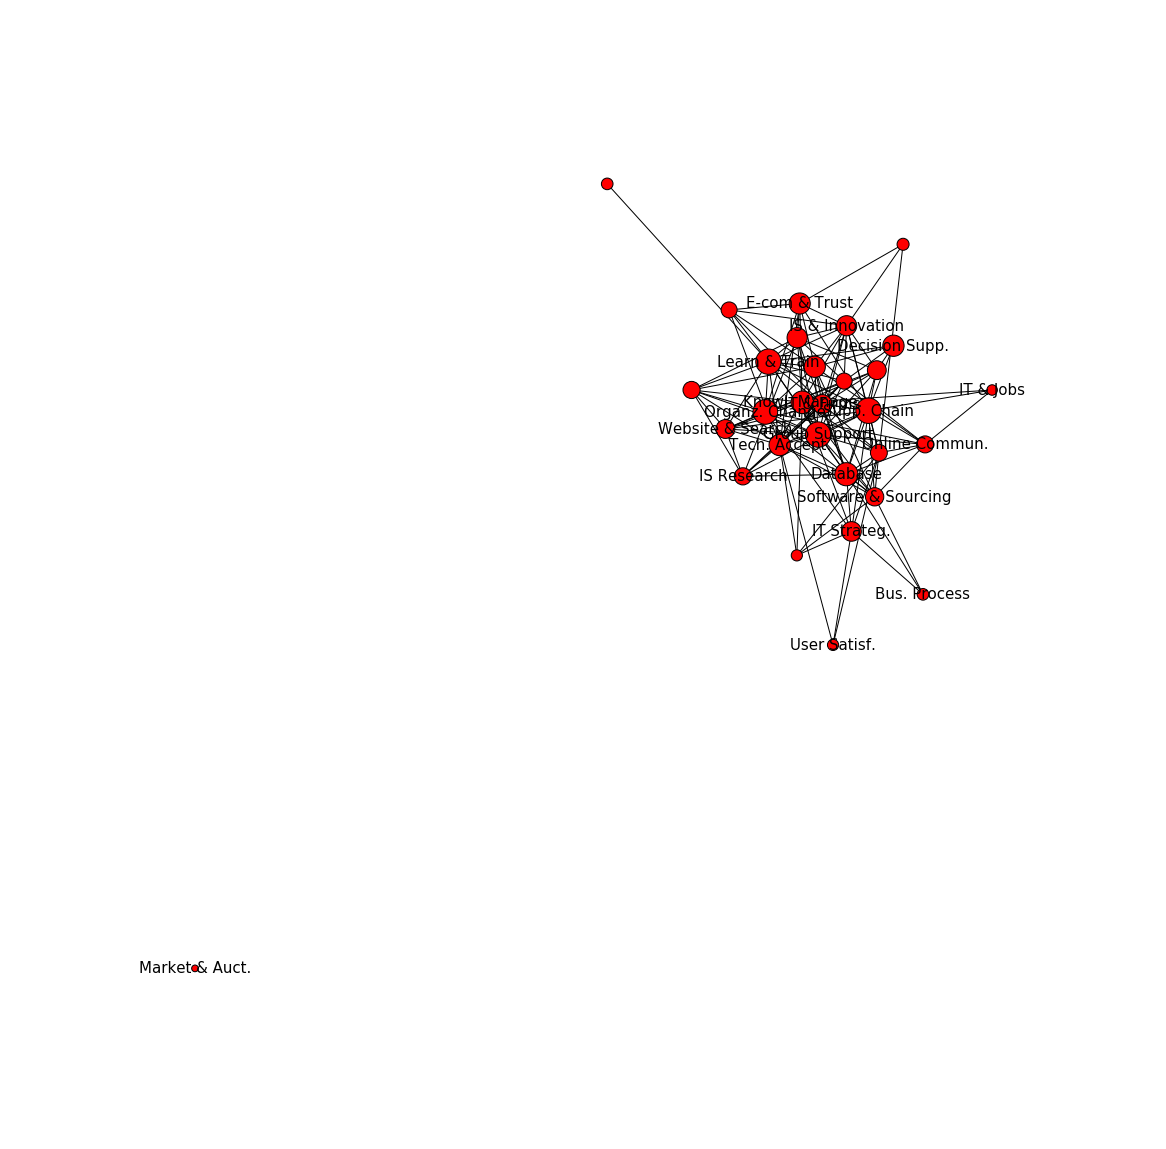

In [18]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
com=community.induced_graph(parts,g, weight='weight')
for (i,j) in com.edges():
    if com[i][j]['weight']<3.5:
        com.remove_edge(i,j)
        
pos = nx.fruchterman_reingold_layout(com)       
plt.figure(figsize=(20,20))
plt.axis("off")        
nx.draw_networkx(com,pos,labels=cluster,cmap = plt.get_cmap("jet"), node_size=node_size , with_labels = True, font_size=15)

In [18]:
df.drop('terms',inplace=True, axis=1)

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
#df[['label','cluster','TC']][df.cluster==4].sort('TC',ascending=False)